Student Performance in Exam

About Dataset

This dataset contain the information about the student performance in exam. This dataset consist of 8 columns:

    
Gender: Male or Female
EthnicGroup: 'group A', 'group B', 'group C', 'group D', 'group E'
ParentEduc : 'high school', 'some high school', 'some college',"associate's degree", "bachelor's degree", "master's degree"
LunchType: 'standard', 'free/reduced'
TestPrep: 'completed', 'none
ParentMaritalStatus': 'married', 'single'
PracticeSport: "regularly, sometimes, never
IsFirstChild:yes, 'no'
NrSiblings: No of siblings 1,2,3,0
TransportMeans: school_bus, NaN
wklystudyhoure: <5, 5-10
math score: Marks earned by students in mathematics
reading score: Marks earned by students in reading
writing score: Marks earned by students in writing

### Student Performance in Exam

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sns

### Read the Dataset

In [2]:
df = pd.read_csv('student_score.csv')

In [3]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


### check the Details of the dataset

In [4]:
df.shape

(30641, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [6]:
df.describe

<bound method NDFrame.describe of        Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType  \
0               0  female         NaN   bachelor's degree      standard   
1               1  female     group C        some college      standard   
2               2  female     group B     master's degree      standard   
3               3    male     group A  associate's degree  free/reduced   
4               4    male     group C        some college      standard   
...           ...     ...         ...                 ...           ...   
30636         816  female     group D         high school      standard   
30637         890    male     group E         high school      standard   
30638         911  female         NaN         high school  free/reduced   
30639         934  female     group D  associate's degree      standard   
30640         960    male     group B        some college      standard   

        TestPrep ParentMaritalStatus PracticeSport IsFirstChild  

### check the null values in the dataset

In [7]:
df.isna().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [9]:
df = df.drop(columns=['Unnamed: 0'])

In [10]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


### check the unique values in each categorical columns

In [11]:
df['Gender'].unique()

array(['female', 'male'], dtype=object)

In [12]:
df['EthnicGroup'].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

In [13]:
df['ParentEduc'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school', nan],
      dtype=object)

In [14]:
df['ParentMaritalStatus'].unique()

array(['married', 'single', 'widowed', nan, 'divorced'], dtype=object)

In [16]:
df['PracticeSport'].unique()

array(['regularly', 'sometimes', 'never', nan], dtype=object)

### change weekly study hour

In [17]:
df["WklyStudyHours"]=df["WklyStudyHours"].str.replace("05-Oct","5-10")

In [18]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


#### Exploratory Data Analysis

## Gender Distrubution

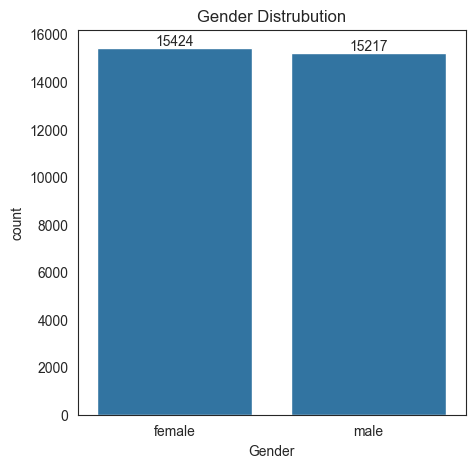

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,5))
ax = sns.countplot(data=df, x="Gender")
ax.bar_label(ax.containers[0])
plt.title("Gender Distrubution")
plt.show()


From  Above chart the no of female in the data is more then the number of male.

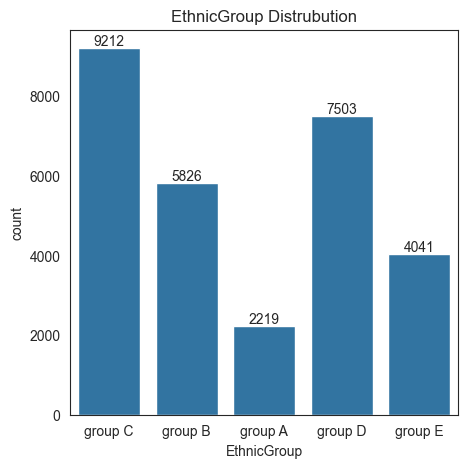

In [23]:
plt.figure(figsize=(5,5))
ax = sns.countplot(data=df, x='EthnicGroup')
ax.bar_label(ax.containers[0])
plt.title("EthnicGroup Distrubution")
plt.show()

Most Common Ethnic group was group c with group A being least common

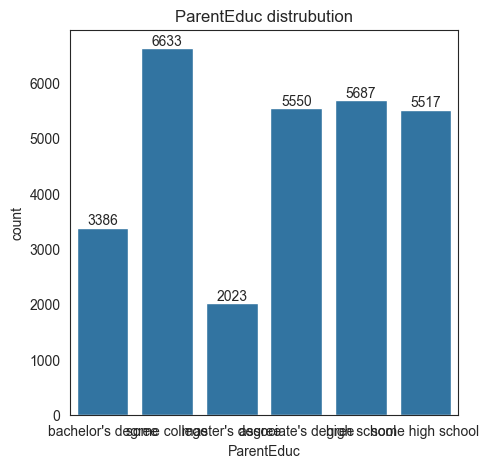

In [24]:
plt.figure(figsize=(5,5))
ax = sns.countplot(data=df, x="ParentEduc")
ax.bar_label(ax.containers[0])
plt.title("ParentEduc distrubution")
plt.show()

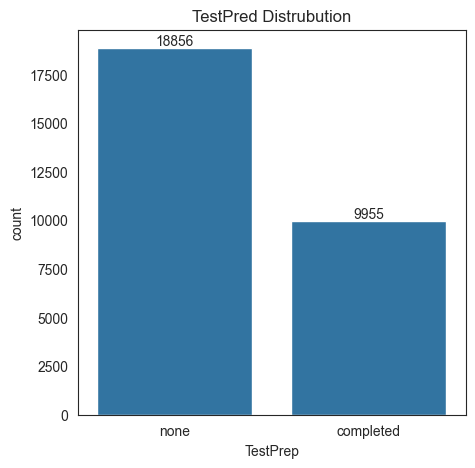

In [25]:
plt.figure(figsize=(5,5))
ax = sns.countplot(data=df, x="TestPrep")
ax.bar_label(ax.containers[0])
plt.title("TestPred Distrubution")
plt.show()

More than 50% student had not done any preparation for test

### count Distribution of numerical columns

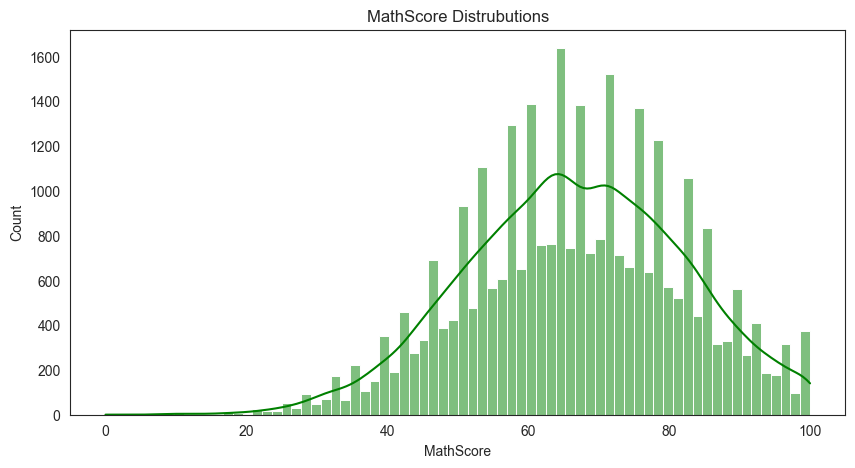

In [27]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data=df, x='MathScore', color= "Green", kde=True)
plt.title("MathScore Distrubutions")
plt.show()

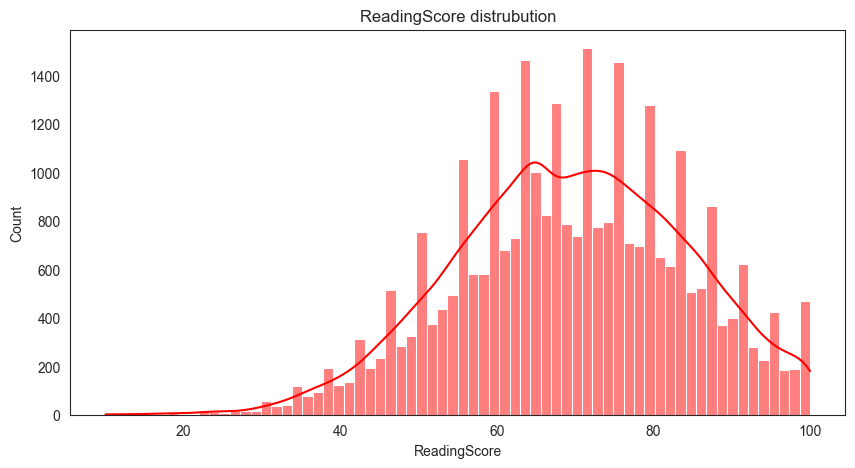

In [28]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data = df, x="ReadingScore", color = "Red", kde = True)
plt.title("ReadingScore distrubution")
plt.show()

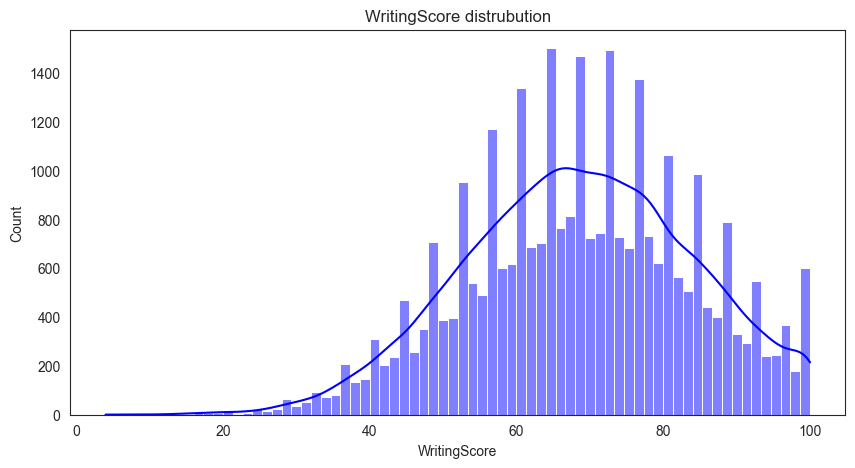

In [29]:
plt.figure(figsize=(10,5))
ax= sns.histplot(data=df, x='WritingScore' ,color= "Blue", kde = True)
#ax.bar_label(ax.containers[0])
plt.title("WritingScore distrubution")
plt.show()

In [30]:
gp  = df.groupby('ParentEduc').agg({"MathScore":'mean', "ReadingScore":'mean', "WritingScore":'mean'})
gp

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


<function matplotlib.pyplot.show(close=None, block=None)>

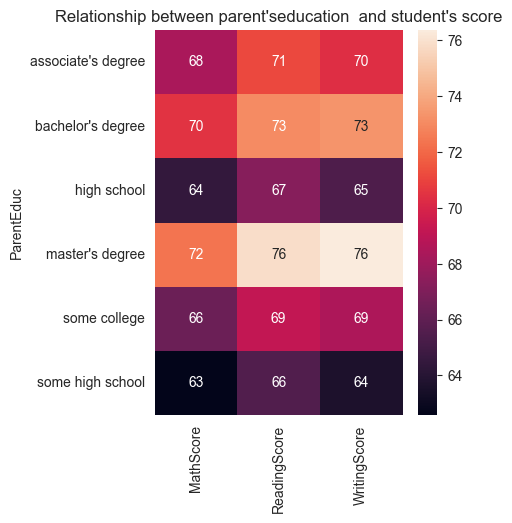

In [31]:
plt.figure(figsize=[4,5])
sns.heatmap(gp, annot =True)
plt.title("Relationship between parent'seducation  and student's score")
plt.show

among the group in parental level of education those student whoes parent had bachelor's or masters's degree fared well in math , reading and writing

from the above chart we have concluded that the education oof the parent have a good impact.

In [32]:
gp1 = df.groupby("ParentMaritalStatus").agg({"MathScore":'mean',"ReadingScore":'mean', "WritingScore":'mean' })
gp

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


<function matplotlib.pyplot.show(close=None, block=None)>

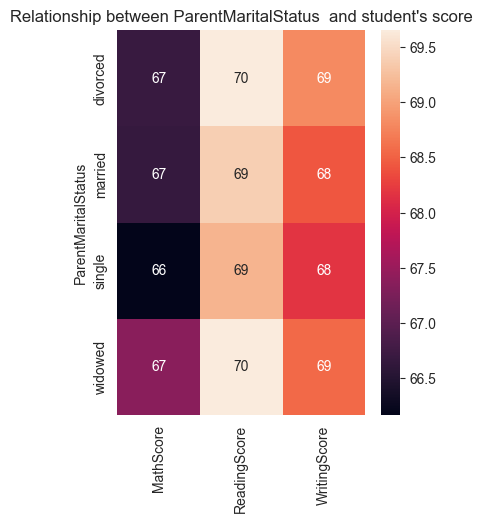

In [33]:
plt.figure(figsize=[4,5])
sns.heatmap(gp1, annot =True)
plt.title("Relationship between ParentMaritalStatus  and student's score")
plt.show

from above chart we have cancludded that there is no / negligible impact on the student score due to their parent merital status.

<Axes: xlabel='MathScore'>

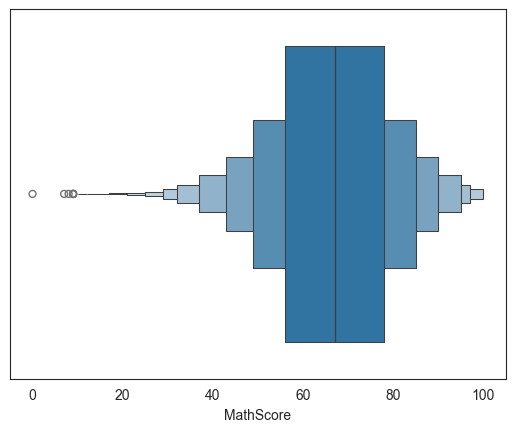

In [35]:
sns.boxenplot(data =df , x="MathScore")

<Axes: xlabel='ReadingScore'>

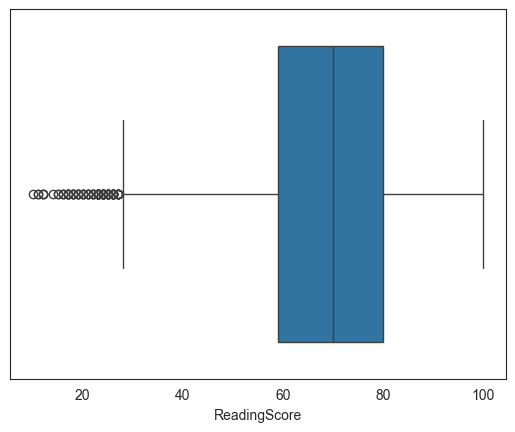

In [36]:
sns.boxplot(data = df, x ="ReadingScore")

<Axes: xlabel='WritingScore'>

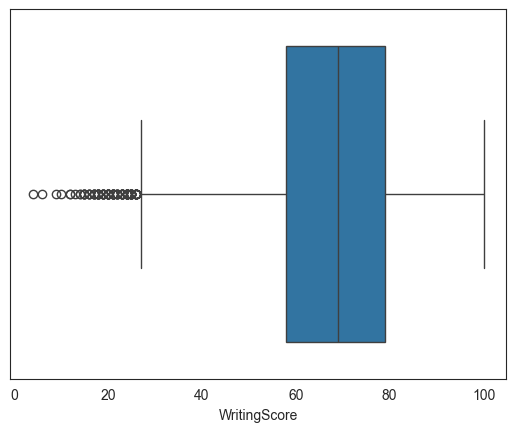

In [37]:
sns.boxplot(data = df, x ="WritingScore")

In [38]:
df['EthnicGroup'].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

## Distribution of ethnic group

In [39]:
groupA = df.loc[(df["EthnicGroup"] == "group A")].count()

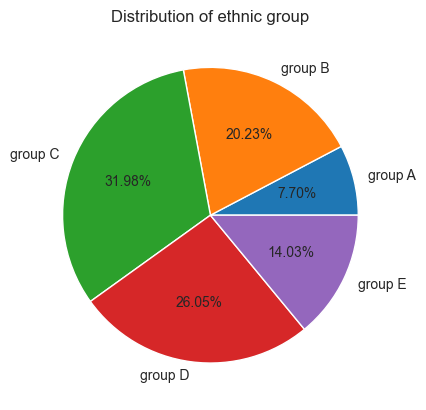

In [40]:
groupA = df.loc[(df['EthnicGroup'] == "group A")].count()
groupB= df.loc[(df['EthnicGroup'] == "group B")].count()
groupC= df.loc[(df['EthnicGroup'] == "group C")].count()
groupD= df.loc[(df['EthnicGroup'] == "group D")].count()
groupE= df.loc[(df['EthnicGroup'] == "group E")].count()
l = ["group A", "group B", "group C","group D","group E"]
mlist = [groupA["EthnicGroup"], groupB["EthnicGroup"], groupC["EthnicGroup"], groupD["EthnicGroup"], groupE["EthnicGroup"]]

plt.pie(mlist , labels = l, autopct = "%1.2f%%")

plt.title("Distribution of ethnic group")
plt.show()

In [41]:
gp2 = df.groupby("WklyStudyHours").agg({"MathScore":'mean',"ReadingScore":'mean', "WritingScore":'mean' })
gp2

,MathScore,ReadingScore,WritingScore
WklyStudyHours,,,
5 - 10,66.870491,69.660532,68.636280
< 5,64.580359,68.176135,67.090192
> 10,68.696655,70.365436,69.777778


<function matplotlib.pyplot.show(close=None, block=None)>

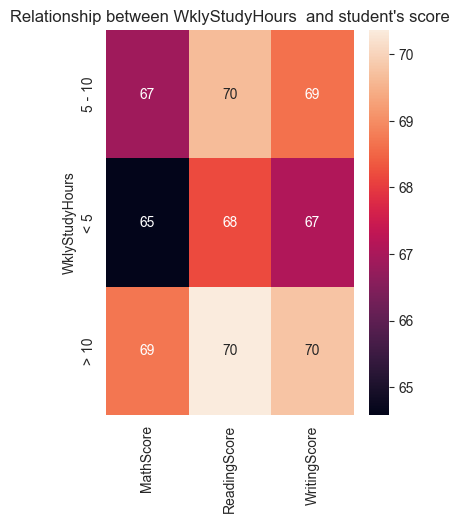

In [42]:
plt.figure(figsize=[4,5])
sns.heatmap(gp2, annot =True)
plt.title("Relationship between WklyStudyHours  and student's score")
plt.show

In [43]:
gp2 = df.groupby("PracticeSport").agg({"MathScore":'mean',"ReadingScore":'mean', "WritingScore":'mean' })
gp2

,MathScore,ReadingScore,WritingScore
PracticeSport,,,
never,64.171079,68.337662,66.522727
regularly,67.839155,69.943019,69.604003
sometimes,66.274831,69.241307,68.072438


<function matplotlib.pyplot.show(close=None, block=None)>

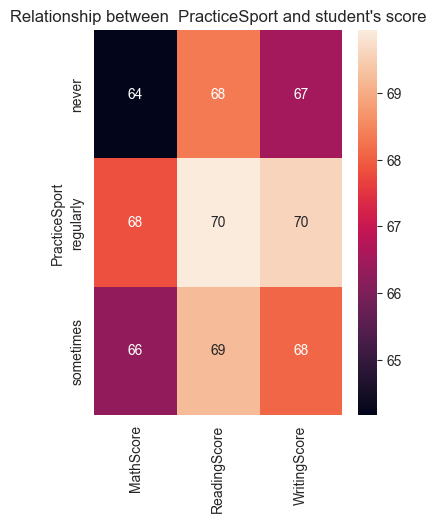

In [44]:
plt.figure(figsize=[4,5])
sns.heatmap(gp2, annot =True)
plt.title("Relationship between  PracticeSport and student's score")
plt.show

In [45]:
import pandas as pd 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [46]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [47]:
y = df['MathScore']

In [48]:
features = ['ReadingScore', 'WritingScore']

In [49]:
X = df[features]

In [50]:
X.head()

,ReadingScore,WritingScore
0,71,74
1,90,88
2,93,91
3,56,42
4,78,75


In [51]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=400)

In [52]:
mat_model = RandomForestRegressor(random_state=1)
mat_model.fit(train_X, train_y)
mat_model_predictions = mat_model.predict(val_X)

In [53]:
mat_model_mae = mean_absolute_error(mat_model_predictions, val_y)

In [54]:
mat_model_mae

7.34766473904475

In [55]:
mat_model_test = mat_model.predict(X)
df['PredMat'] = mat_model_test.round()

In [56]:
df.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore,PredMat
count,29069.000000,30641.000000,30641.000000,30641.000000,30641.000000
mean,2.145894,66.558402,69.377533,68.418622,66.518554
std,1.458242,15.361616,14.758952,15.443525,12.785596
min,0.000000,0.000000,10.000000,4.000000,7.000000
25%,1.000000,56.000000,59.000000,58.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000,67.000000
75%,3.000000,78.000000,80.000000,79.000000,76.000000
max,7.000000,100.000000,100.000000,100.000000,97.000000


In [57]:
mat_vs_pred = pd.DataFrame(df['MathScore'])

In [58]:
mat_vs_pred['predicted'] = mat_model_test

In [59]:
mat_vs_pred['predicted'] = round(mat_vs_pred['predicted'], 0)

In [60]:
mat_vs_pred

,MathScore,predicted
0,71,70.0
1,69,82.0
2,87,87.0
3,45,50.0
4,76,73.0
...,...,...
30636,59,61.0
30637,58,49.0
30638,61,64.0
30639,82,84.0


In [61]:
mat_vs_pred['diff'] = mat_vs_pred['MathScore'] - mat_vs_pred['predicted']

In [62]:
mat_vs_pred

,MathScore,predicted,diff
0,71,70.0,1.0
1,69,82.0,-13.0
2,87,87.0,0.0
3,45,50.0,-5.0
4,76,73.0,3.0
...,...,...,...
30636,59,61.0,-2.0
30637,58,49.0,9.0
30638,61,64.0,-3.0
30639,82,84.0,-2.0


In [63]:
actual_predic_mat_vs_pred = pd.DataFrame(mat_vs_pred['MathScore'])
actual_predic_mat_vs_pred

,MathScore
0,71
1,69
2,87
3,45
4,76
...,...
30636,59
30637,58
30638,61
30639,82


In [64]:
actual_predic_mat_vs_pred['predicted'] = mat_vs_pred['predicted']
actual_predic_mat_vs_pred

,MathScore,predicted
0,71,70.0
1,69,82.0
2,87,87.0
3,45,50.0
4,76,73.0
...,...,...
30636,59,61.0
30637,58,49.0
30638,61,64.0
30639,82,84.0


In [66]:
actual_predic_mat_vs_pred.to_csv('ScorePreds.csv' , index=False)

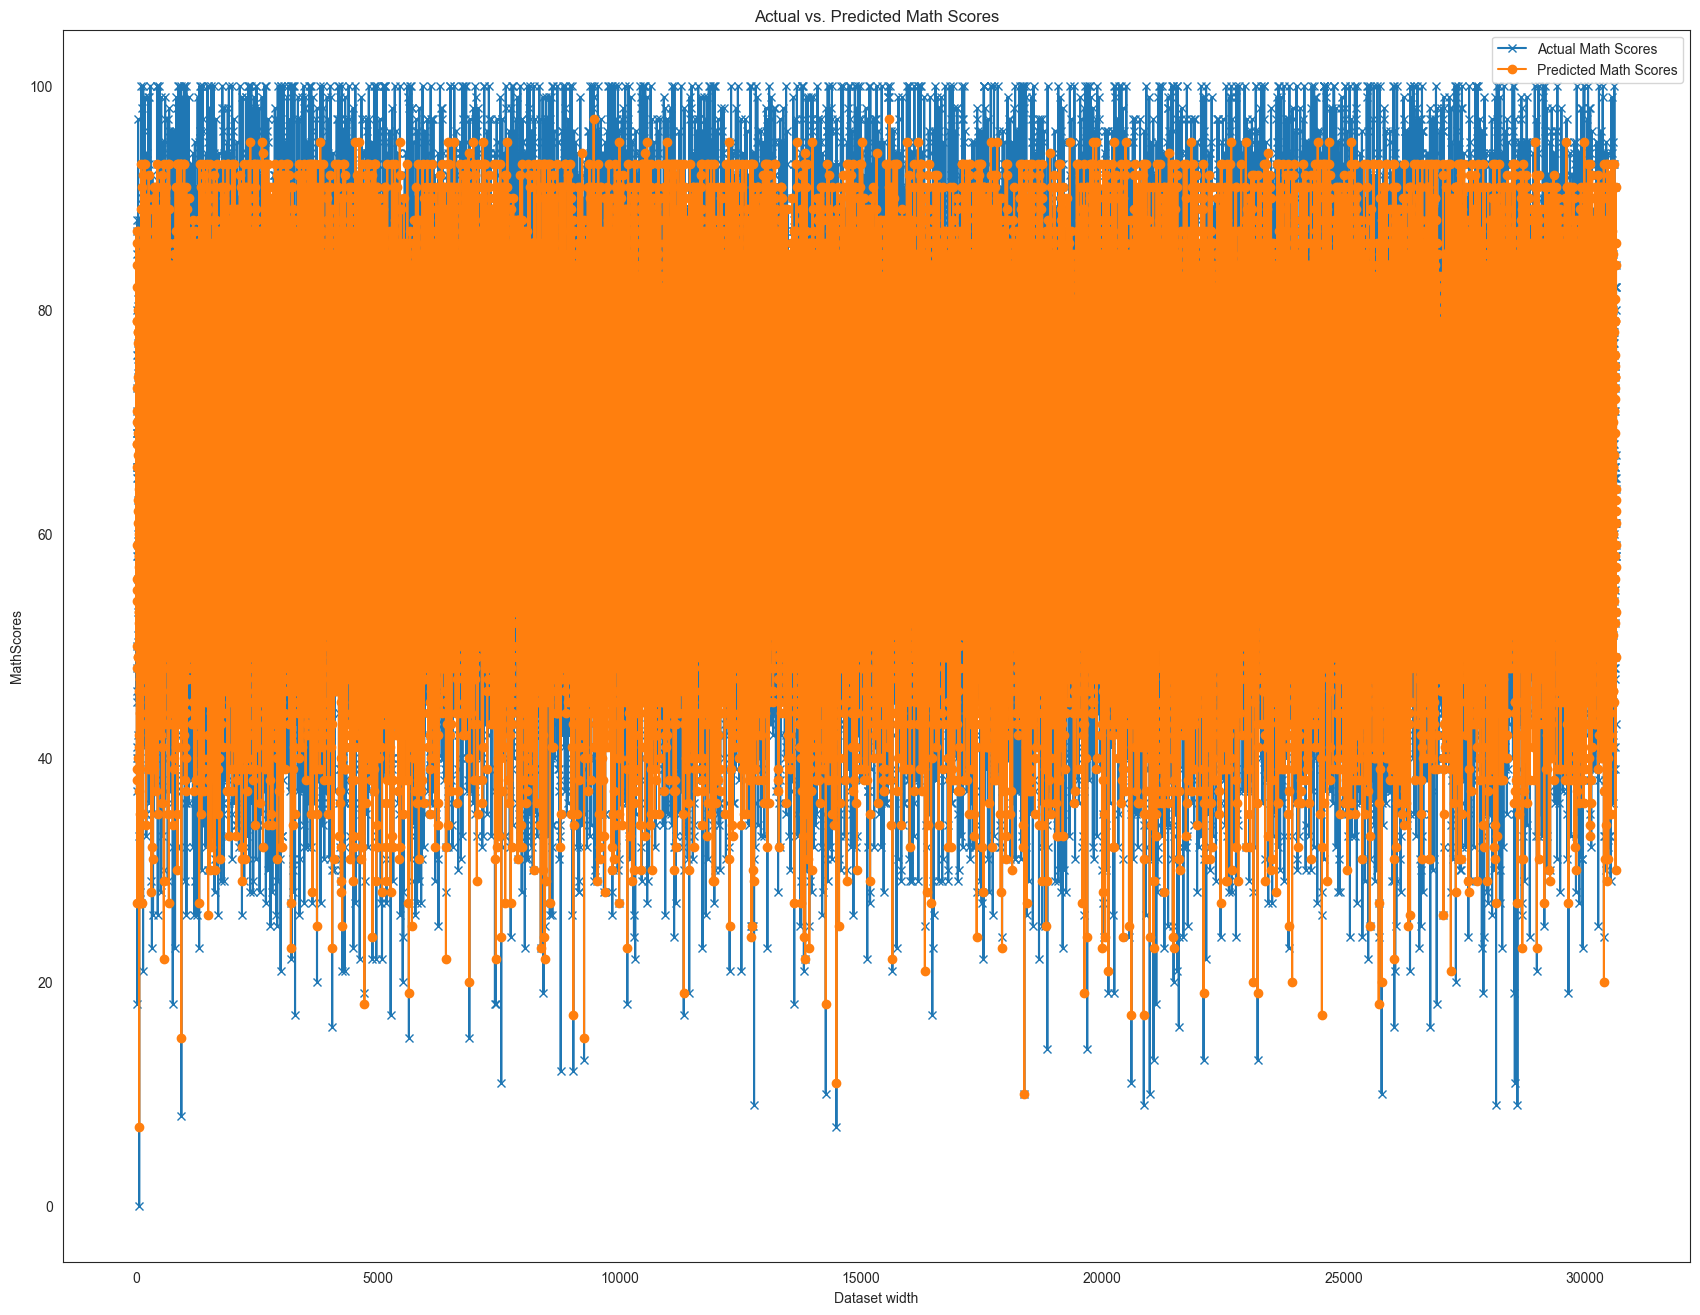

In [65]:
plt.figure(figsize=(21, 16))
plt.plot(actual_predic_mat_vs_pred['MathScore'] ,label='Actual Math Scores', marker='x'); 
plt.plot(actual_predic_mat_vs_pred['predicted'], label='Predicted Math Scores', marker='o')
plt.xlabel('Dataset width'); 
plt.ylabel('MathScores'); 
plt.title('Actual vs. Predicted Math Scores')
plt.legend(); 
plt.show()

Conclusion and Summary
Males are more than Females

Most common race/ethnic group was Group C with Group A being least common

Most common parental level of education was some college with master's degree being least common

Most common lunch type was standard

More than 50% of students had not done any preparation for test.

Among the scores the means were comparable and all had good correlation with each other

Males performed better in Math whereas females were better in reading and writing

In respect to race/ethnicity group E performed better in Math and reading whereas group D was better in writing

Among the groups in Parental level of education those students whoes parents had bachelor's or master's degree fared well in math, reading and writing

All the interactions between categorical and continous variable achived high statistical significance whereas among the categorical varaibles only the assocations between gender and parental level of education achieved statistical significance

The implication being those analysis which achieved statistical significance are generalisable to entire population